In [219]:
import pandas as pd
import numpy as np
import matplotlib as inline
%matplotlib inline
import seaborn as sns

In [220]:
test=pd.read_csv("testHR.csv")

In [221]:
train=pd.read_csv("trainHR.csv")

In [222]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [223]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [224]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [225]:
train.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [226]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [227]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [228]:
train.shape

(54808, 14)

In [229]:
train.size

767312

In [230]:
train['education'].replace(np.nan,'DK',inplace=True)  ## replacing all the null values with don't know(DK)

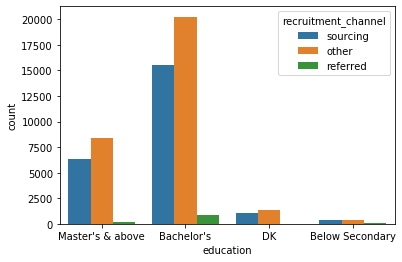

In [231]:
sns.countplot(x="education",data=train,hue="recruitment_channel")

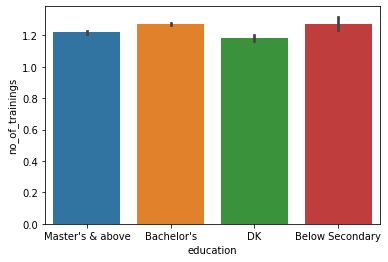

In [232]:
sns.barplot(x="education",data=train,y="no_of_trainings")

In [233]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [234]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
DK                   2409
Below Secondary       805
Name: education, dtype: int64

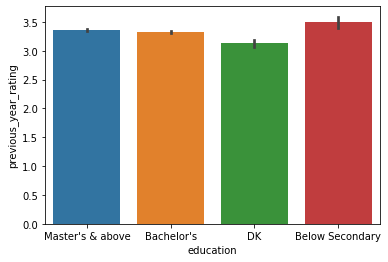

In [235]:
sns.barplot(x="education",data=train,y="previous_year_rating")

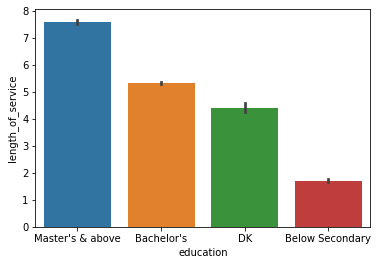

In [236]:
sns.barplot(x="education",data=train,y="length_of_service")

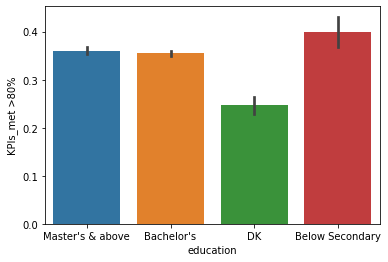

In [237]:
sns.barplot(x="education",data=train,y="KPIs_met >80%")

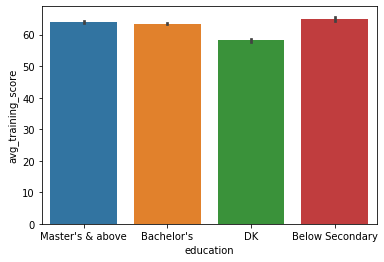

In [238]:
sns.barplot(x="education",data=train,y="avg_training_score")

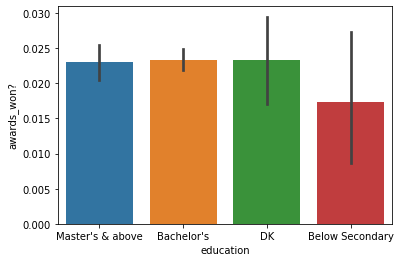

In [239]:
sns.barplot(x="education",data=train,y="awards_won?")

In [240]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

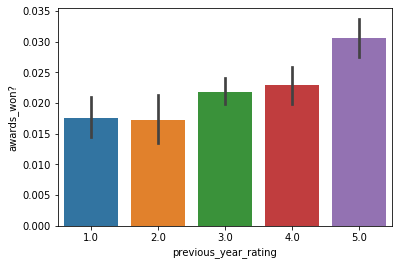

In [241]:
sns.barplot(x="previous_year_rating",data=train,y="awards_won?")

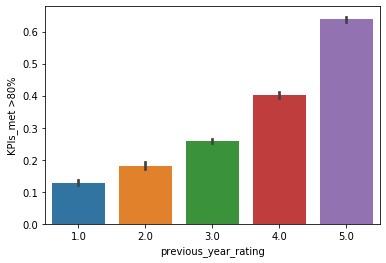

In [242]:
sns.barplot(x="previous_year_rating",data=train,y="KPIs_met >80%")

In [243]:
train["previous_year_rating"].fillna(train["previous_year_rating"].median(),inplace=True) ##that's why filling it with median.

In [244]:
#train.previous_year_rating.replace(np.nan,"KPIs_met >80",inplace=True)

In [245]:
train.previous_year_rating.isnull().sum()

0

In [246]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [247]:
#train=pd.get_dummies(["gender","employee_id","recruitment_channel"],axis=1)
#train.head()

In [248]:
train1=train.drop(["gender","employee_id","recruitment_channel"],axis=1)

In [249]:
train1

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,DK,1,29,1.0,2,0,0,45,0


In [250]:
df=pd.get_dummies(train1,drop_first=True)

In [251]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_DK,education_Master's & above
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
x=df.drop(["is_promoted","education_Below Secondary"],axis=1)
y=df["is_promoted"]

In [253]:
#train.corr()

# ML MODEL

In [254]:
#x=train.drop(["gender","employee_id","recruitment_channel"],axis=1)
#y=train['is_promoted']

In [255]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [256]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 7)

In [257]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [258]:
y_pred = clf.predict(x_test)

In [259]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [260]:
print('Accuracy_score: ',accuracy_score(y_test, y_pred)*100)
print('\n','Classification_report: ','\n','\n',classification_report(y_test, y_pred))

Accuracy_score:  92.07261448640759

 Classification_report:  
 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9996
           1       0.82      0.13      0.22       966

    accuracy                           0.92     10962
   macro avg       0.87      0.56      0.59     10962
weighted avg       0.91      0.92      0.89     10962



In [261]:
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[9968   28]
 [ 841  125]]


# FOR TEST DATA

In [262]:
test=pd.read_csv("testHR.csv")

In [263]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [264]:
test.shape

(23490, 13)

In [265]:
len(test)

23490

In [266]:
test.size

305370

In [267]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [268]:
test.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [269]:
test['education'].replace(np.nan,'DK',inplace=True)  ## replacing all the null values with don't know(DK)

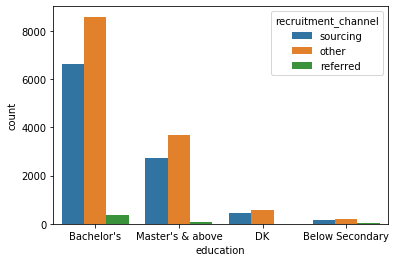

In [270]:
sns.countplot(x="education",data=test,hue="recruitment_channel")

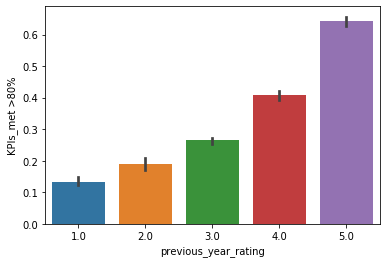

In [271]:
sns.barplot(x="previous_year_rating",data=test,y="KPIs_met >80%")

In [272]:
#test.previous_year_rating.replace(np.nan,"KPIs_met >80",inplace=True)

In [273]:
test["previous_year_rating"].fillna(test["previous_year_rating"].median(),inplace=True) ##that's why filling it with median.

In [274]:
test.previous_year_rating.isnull().sum()

0

In [275]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [276]:
test_df=test.drop(["employee_id","recruitment_channel","gender"],axis=1)

In [277]:
test1=pd.get_dummies(test_df,drop_first=True)

In [278]:
test_t=test1.drop(["education_Below Secondary"],axis=1)

In [279]:
#test=pd.get_dummies(test,columns=["department","region","education","gender","recruitment_channel","age","previous_year_rating"],drop_first=True)
#test.head()

In [280]:
#df_test=pd.get_dummies(test,drop_first=True)
#df_test=test.drop(['employee_id','length_of_service','awards_won?','department_Finance','department_HR',
                   #'department_Legal','age_56','age_57','age_58','age_59','age_60','previous_year_rating_2.0',
                   #'previous_year_rating_3.0','previous_year_rating_4.0','previous_year_rating_5.0'],axis=1)

In [281]:
#df_test.head()

In [282]:
y_pred_test = clf.predict(test_t)

In [283]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [284]:
Y=pd.DataFrame(y_pred_test)

In [285]:
Y.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [286]:
Y_pred_test = clf.predict(test_t)

In [287]:
sm=pd.read_csv("sample submission HR.csv")

In [288]:
sm.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [289]:
submit=pd.concat([sm.employee_id,Y],axis=1)

In [290]:
submit.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [291]:
submit.columns=["employee_id","is_promoted"]

In [292]:
submit.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [293]:
submit.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [294]:
submit['employee_id'].value_counts()

34815    1
39622    1
60104    1
25289    1
23902    1
        ..
21776    1
78107    1
17682    1
24363    1
65536    1
Name: employee_id, Length: 23490, dtype: int64

In [295]:
submit['is_promoted'].value_counts()

0    23189
1      301
Name: is_promoted, dtype: int64

In [296]:
submit.to_csv("Submission1.csv",index=False)

In [297]:
Submission1=pd.read_csv("Submission1.csv")

In [298]:
Submission1.isnull().sum().sort_values(ascending=False)

is_promoted    0
employee_id    0
dtype: int64

In [299]:
sample=pd.read_csv("sample submission HR.csv")

In [300]:
len(sample)

23490

In [301]:
len(Submission1)

23490

In [309]:
Submission1.isnull().sum()

employee_id    0
is_promoted    0
dtype: int64

In [303]:
#sub=Submission1.fillna("null",inplace=True)

In [304]:
#test["previous_year_rating"].fillna(test["previous_year_rating"].median(),inplace=True) ##that's why filling it with median.

In [305]:
#sub.loc[sub["employee_id"]=="null"]

In [306]:
#Submission1.info()

In [307]:
#sub.loc[sub["is_promoted"]=="null"]

In [308]:
#.is_promoted.value_counts()